------------------------------------------------------------------------------------------------------------
Separation Time = 0



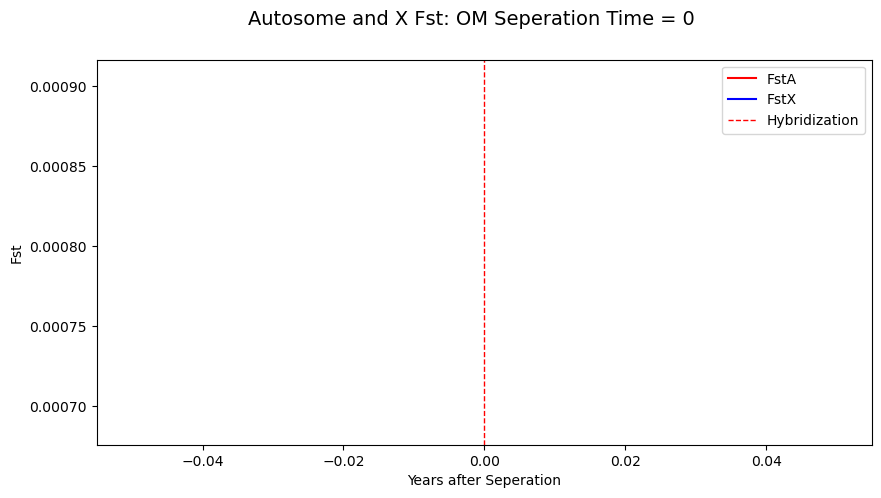

------------------------------------------------------------------------------------------------------------
Separation Time = 5000



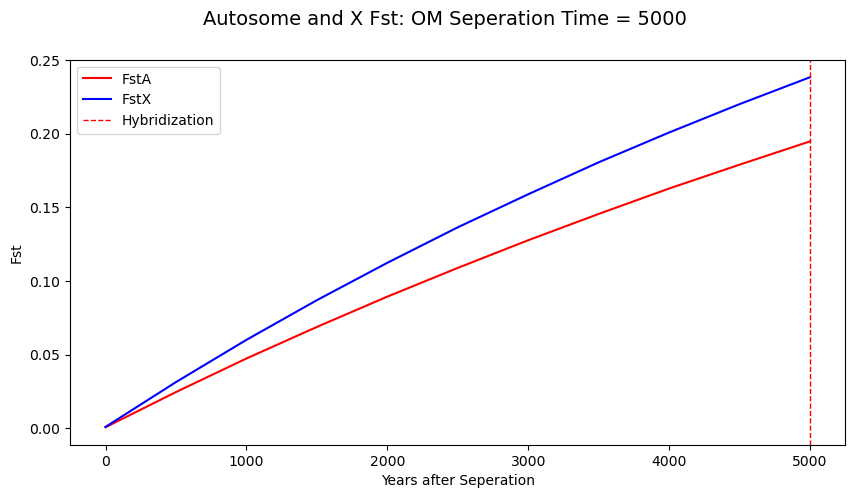

------------------------------------------------------------------------------------------------------------
Separation Time = 10000



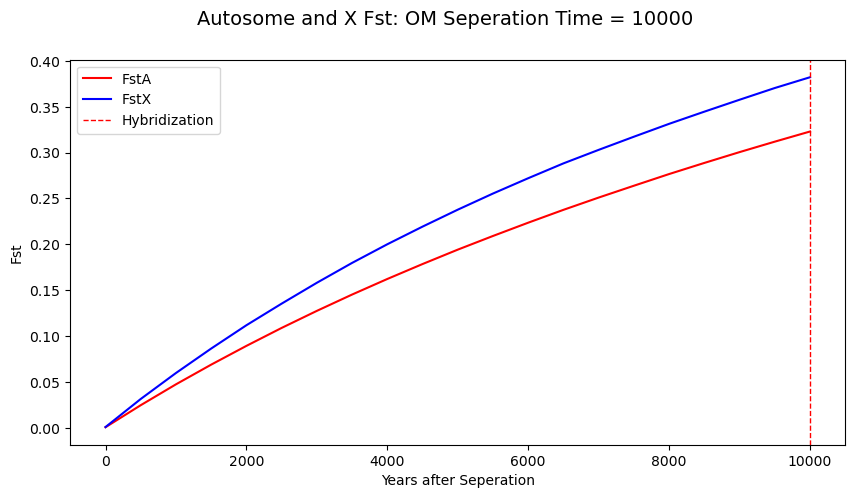

------------------------------------------------------------------------------------------------------------
Separation Time = 15000



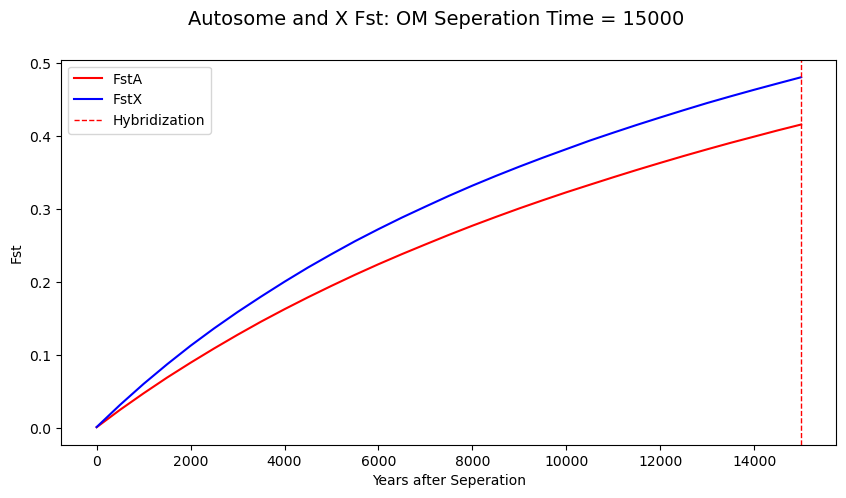

------------------------------------------------------------------------------------------------------------
Separation Time = 20000



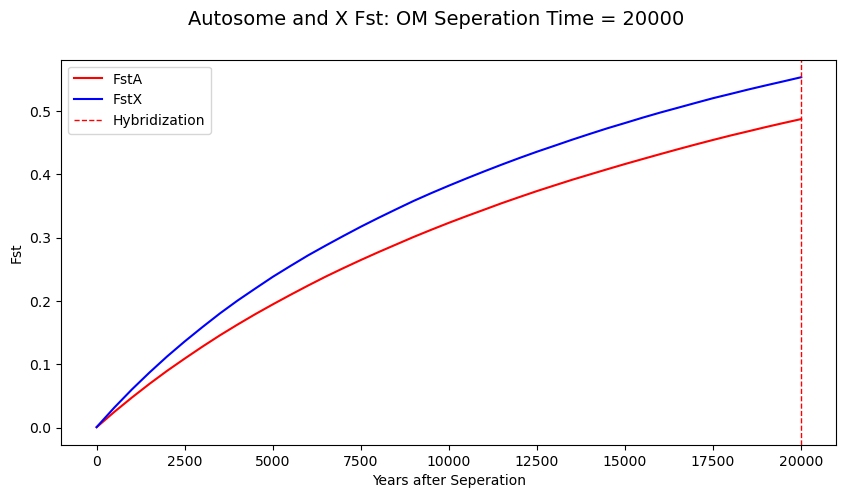

------------------------------------------------------------------------------------------------------------
Separation Time = 25000



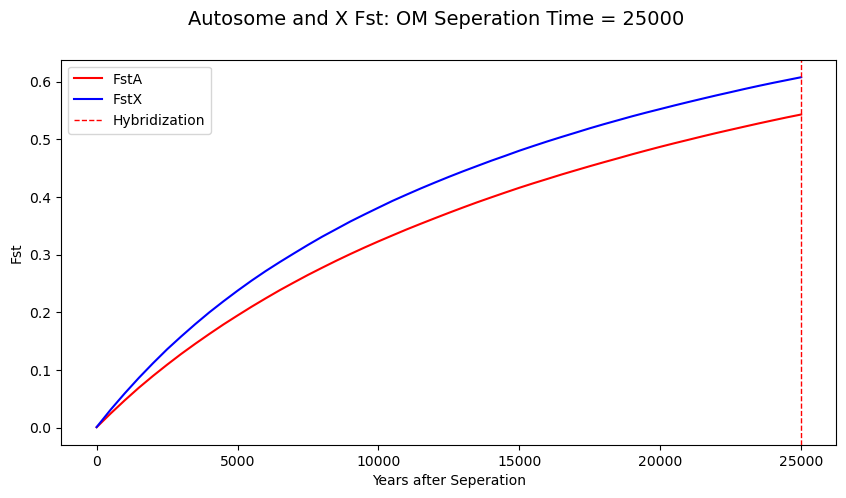

------------------------------------------------------------------------------------------------------------
Separation Time = 30000



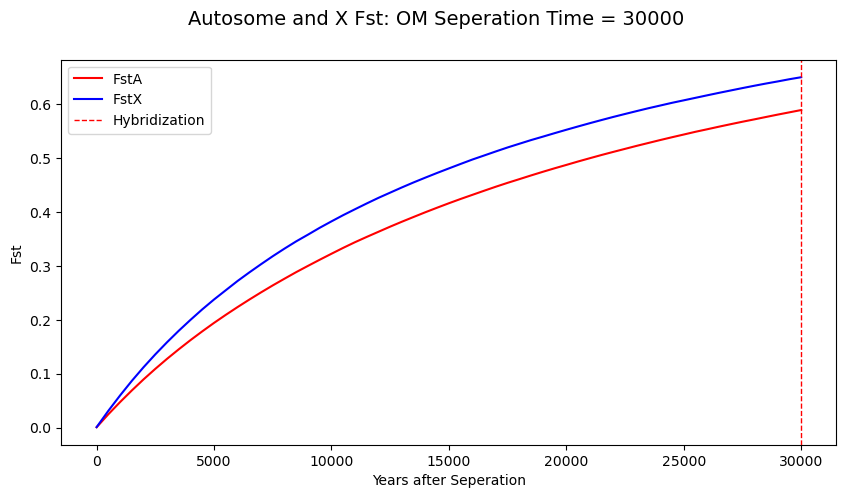

In [1]:
#Number of Migrants = 1

import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Hybridization/2SLiM_Files/"
#FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWFV_MigV2/"

TSEP = [0,5000,10000,15000,20000,25000,30000]
#TSEP = [20000]
nmig = 1

counter = 0

expected_ratio = 0.75
SR = 0.5
Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
expected_teta = round (4*Ne*40*1.25e-8,10)

for tsep in TSEP:
    L_FstA = []
    L_FstX = []
    N = int(1+tsep/500)
    for NUM in range(1,21):
        FstX = []
        FstA = []
        File = FOLDER + f"NWFLT_Hyb_Fst_OM{tsep},{nmig},{NUM}.txt"
        if os.path.isfile(File):
            with open(File, 'r', encoding='utf-8') as Text:
                for ligne in Text:
                    Values = ligne.strip().split()
                    if len(Values) > 1:
                        try:
                            FstA.append(float(Values[0]))
                            FstX.append(float(Values[1]))
                        except (ValueError, ZeroDivisionError):
                            pass  # ou afficher un message d'erreur si tu veux
        L_FstA.append(FstA)
        L_FstX.append(FstX)
    FstA_mean = [0 for j in range (N)]
    FstX_mean = [0 for j in range (N)]
    for j in range (N):
        Sa = 0
        Sx = 0
        for el in L_FstA: 
                Sa += el[j]
        for el in L_FstX: 
                Sx += el[j]
        FstA_mean[j] = Sa/len(L_FstA)
        FstX_mean[j] = Sx/len(L_FstX)
    Steps = [500*j for j in range (N)]
    
    print("------------------------------------------------------------------------------------------------------------")
    print("Separation Time = "+str(tsep))
    print()

    fig, ax = mp.subplots(figsize=(10, 5))
    fig.suptitle(f"Autosome and X Fst: OM Seperation Time = {tsep}", fontsize=14)

    ax.plot(Steps, FstA_mean,color ="r",label = "FstA")
    ax.plot(Steps, FstX_mean,color ="b",label = "FstX")
    ax.set_xlabel("Years after Seperation")
    ax.set_ylabel("Fst")
    #ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
    #ax.axhline(y=0.8293897929682634, color='orange', linestyle='--',linewidth=2, label='Burning Period Ratio')
    ax.axvline(x=tsep, color='red', linestyle='--', linewidth=1, label='Hybridization')
    ax.legend()

    mp.show()
          